In [8]:
import os,re
import docx2txt
import textract
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
nltk.download("stopwords")
import xgboost as xgb

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install textract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 49.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.5/128.

In [5]:
pip install docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 KB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docx: filename=docx-0.2.4-py3-none-any.whl size=53922 sha256=15d408c82b9509cf7918e65b367d92a1f01d452fd014e0bfbe7324919a02a5f3
  Stored in directory: /root/.cache/pip/wheels/0f/8e/9d/7003eed35a84cf960876aae6bdf60d02041ddfcca66eceee94
Successfully built docx


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
os.listdir('/content/drive/MyDrive/Resumes')

['Peoplesoft resumes',
 'workday resumes',
 'SQL Developer Lightning insight',
 'React JS Developer Resume']

In [14]:
file_path = []
category = []
directory = '/content/drive/MyDrive/Resumes/React JS Developer Resume'
for i in os.listdir(directory):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory, i)
    file_path.append((textract.process(os.path.join(directory, i))).decode('utf-8'))
    category.append('React JS Developer Resume')

In [15]:
file_path, category

(['MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n\n\t   Around 2  years of experience in software design, development, implementation and maintenance of applications using, HTML, CSS, JavaScript, JQuery, PHP, MySQL, React js , Node Js.\n\nKnowledge in Object Oriented PHP Programming.\n\nKnowledge in versioning control like GIT.\n\nInvolved in Responsive web development using Bootstrap.\n\nStrong Analytical, Problem solving skills, Presentation skills and  good team player.\n\nI can work with independently.\n\n\n\n\n\nSCHOLASTICS\n\n                B.Tech (Computer Science Engineering.) from VKR ,VNB & AGK  College of Engineering and Technology,  Gudiwada, affiliated to JNTUK with 76.4% in 2019.\n\nTECHNICAL SKILLS\n\nWeb Technologies\t                :\tHTML, CSS, BOOTSTAP,JAVASCRIPT, JQUERY, \n\n                                                                             PHP, React js , Node js.                                                                              \n\nDatabase\

In [16]:
file_path_1 = []
category_1 = []
directory_1 = '/content/drive/MyDrive/Resumes/Peoplesoft resumes'
for i in os.listdir(directory_1):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_1, i)
    file_path_1.append((textract.process(os.path.join(directory_1, i))).decode('utf-8'))
    category_1.append('PeopleSoft resume')


In [17]:
file_path_1, category_1 

(['Hari Narayana \t\t              \n\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFESSIONAL SUMMARY\n\nHaving 4.6 years of experience in PeopleSoft application enhancement, implementation, Data conversion, Support and Upgrade projects. Well experienced on People tools and having Functional knowledge HCM and FSCM Applications.\n\nSkill\n\n\n\n\n\n\n\nPeople Tools\n\nApplication Designer, Application Engine, People Code, Application Packages\n\nPeopleSoft Application\n\nFSCM and HCM Applications\n\nFSCM Modules\n\nProcurement, PO, AP, AR, Billing and GL\n\nHCM Modules\n\nRecruiting, Performance Management, WAF, Benefits\n\nInterfaces\n\nComponent Interface and File Layout\n\nOther Languages\n\nC, C++\n\nDatabase \n\nOracle, SQL Server, DB2\n\nOperating System\n\nWindows, UNIX\n\n\n\n\n\nEDUCATION\n\n\n\n\n\n\n\nBachelor of Technology (B-Tech) from JNTU-K\n\n\t   Currently Working as a People Soft Consultant in Randstad, Hyderabad\n\n\n\n\n\nRELEVANT EXPERIENCE\n\nPeopleSoft Consultant – Randst

In [18]:
file_path_2 = []
category_2 = []
directory_2 = '/content/drive/MyDrive/Resumes/SQL Developer Lightning insight'
for i in os.listdir(directory_2):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_2, i)
    file_path_2.append((textract.process(os.path.join(directory_2, i))).decode('utf-8'))
    category_2.append('SQL Developer Lightning Insight Resume')
file_path_2, category_2

(["BUDDHA VAMSI                                                            \n\n\n\nCAREER OBJECTIVE:\n\n\n\nHave 2.11 years of IT experience as Database Engineer and currently working in Fluentgrid Limited Visakhapatnam from August 2018 as Database Engineer.\n\n Having good hands on SQL, PLSQL at various databases like Oracle, MS Sql Server.\n\nExpertise in creating/modifying Tables, Views, Stored Procedures, Functions and indexes.\n\nHaving knowledge on Triggers, Temporary tables, CTE Recursive Methods.\n\nExpertise in writing transformations (ETL) using Business Intelligence tools like Pentaho Kettle.\n\n\n\n\n\n\n\nEXPERIENCE : \n\nMS-SQL,PL/SQL-Oracle DEVELOPER Aug-2018-Present\n\nFLUENTGRID LIMITED, Visakhapatnam\n\nDesigned the database architecture for client projects.\n\nIm Working with NDMC,KESCO,UPPCL,UGVCL,Bosch Smart electricity Power utility projects.\n\nDeveloped  Data Flow Diagrams and data structure diagrams.\n\nConfigured,tuned and maintained MS-SQL Server database ser

In [19]:
file_path_3 = []
category_3 = []
directory_3 = '/content/drive/MyDrive/Resumes/workday resumes'
for i in os.listdir(directory_3):
  if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
    os.path.join(directory_3, i)
    file_path_3.append((textract.process(os.path.join(directory_3, i))).decode('utf-8'))
    category_3.append('Workday Resume')
file_path_3, category_3

(['Chinna Subbarayudu M\n\nDOB: 06th March 1994\n\nNationality: Indian\n\n\t\t\n\n\t\t\tPROFILE SUMMARY:\n\n\n\n\n\n\n\nHaving around 5.1 years of IT experience in developing and Implementation of ERP technology by using Workday HCM and ETL (informatica) technologies.\n\n3.6 years of experience as Workday Integration Consultant and involved in a maintenance and implementation.\n\nExperience in all phases in Workday like requirements gathering, Analysis, Design, Development and Testing.\n\nHands on experience in inbound/ outbound integrations using core connector, Workday studio, managing business processes, working with EIB, report writer.\n\nDeveloped and maintained custom-report types (Advanced, Matrix, Composite) using report writer tool.\n\nInvolved in transformation of XML into XSLT for presenting data for different web Services.\n\nBuilding Workday Integration (EIB), calculated fields, Custom Reports and Writing XSLT transformation code.\n\nDeveloped testing\xa0strategies and val

In [20]:
data_1 = pd.DataFrame(data = file_path , columns = ['Resumes'])
data_1['category'] = category
data_1

,Resumes,category
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
5,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume
6,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume
7,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
9,Name: Ravali P \n\n\n\n ...,React JS Developer Resume


In [21]:
data_2 = pd.DataFrame(data = file_path_1 , columns = ['Resumes'])
data_2['category_1'] = category_1
data_2

,Resumes,category_1
0,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft resume
1,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft resume
2,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft resume
3,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft resume
4,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft resume
5,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft resume
6,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft resume
7,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft resume
8,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft resume
9,Classification: Internal\n\nClassification: In...,PeopleSoft resume


In [22]:
data_3 = pd.DataFrame(data = file_path_2 , columns = ['Resumes'])
data_3['category_2'] = category_2
data_3

,Resumes,category_2
0,BUDDHA VAMSI ...,SQL Developer Lightning Insight Resume
1,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer Lightning Insight Resume
2,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer Lightning Insight Resume
3,KAMBALLA PRADEEP ...,SQL Developer Lightning Insight Resume
4,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer Lightning Insight Resume
5,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer Lightning Insight Resume
6,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer Lightning Insight Resume
7,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer Lightning Insight Resume
8,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer Lightning Insight Resume
9,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer Lightning Insight Resume


In [23]:
data_4 = pd.DataFrame(data = file_path_3 , columns = ['Resumes'])
data_4['category_3'] = category_3
data_4

,Resumes,category_3
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday Resume
1,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday Resume
2,Vinay kumar .v\nWorkday Functional Consultant\...,Workday Resume
3,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday Resume
4,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday Resume
5,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday Resume
6,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday Resume
7,Workday HCM Techno functional Consultant ...,Workday Resume
8,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resume
9,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday Resume


In [24]:
df = data_1.append([data_2, data_3, data_4], ignore_index = True)
df

<ipython-input-24-acc6a2e07cad>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_1.append([data_2, data_3, data_4], ignore_index = True)


,Resumes,category,category_1,category_2,category_3
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,NaN,NaN,NaN
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,NaN,NaN,NaN
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,NaN,NaN,NaN
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,NaN,NaN,NaN
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,NaN,NaN,NaN
...,...,...,...,...,...
74,Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...,NaN,NaN,NaN,Workday Resume
75,Punugoti Swetha\n\nWorkday Technical Consultan...,NaN,NaN,NaN,Workday Resume
76,Shireesh Balasani ...,NaN,NaN,NaN,Workday Resume
77,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Workday Resume


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resumes     79 non-null     object
 1   category    24 non-null     object
 2   category_1  20 non-null     object
 3   category_2  14 non-null     object
 4   category_3  21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


In [26]:
df.duplicated().sum()

0

In [27]:
df['Category'] = category + category_1 + category_2 + category_3
df

,Resumes,category,category_1,category_2,category_3,Category
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,NaN,NaN,NaN,React JS Developer Resume
...,...,...,...,...,...,...
74,Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...,NaN,NaN,NaN,Workday Resume,Workday Resume
75,Punugoti Swetha\n\nWorkday Technical Consultan...,NaN,NaN,NaN,Workday Resume,Workday Resume
76,Shireesh Balasani ...,NaN,NaN,NaN,Workday Resume,Workday Resume
77,Workday Integration Consultant\n\n\n\nName ...,NaN,NaN,NaN,Workday Resume,Workday Resume


In [28]:
df.drop(['category', 'category_1', 'category_2', 'category_3'], axis = 1, inplace = True)
df


,Resumes,Category
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
...,...,...
74,Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...,Workday Resume
75,Punugoti Swetha\n\nWorkday Technical Consultan...,Workday Resume
76,Shireesh Balasani ...,Workday Resume
77,Workday Integration Consultant\n\n\n\nName ...,Workday Resume


In [29]:
df.to_csv('Resume.csv', index=False)

# EDA

In [30]:
data = pd.read_csv('Resume.csv')

In [31]:
data

,Resumes,Category
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
...,...,...
74,Name\t: Naresh Babu Cherukuri\n\n\n\nObjective...,Workday Resume
75,Punugoti Swetha\n\nWorkday Technical Consultan...,Workday Resume
76,Shireesh Balasani ...,Workday Resume
77,Workday Integration Consultant\n\n\n\nName ...,Workday Resume


In [32]:
import string
import warnings
warnings.filterwarnings('ignore')
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [34]:
data.duplicated().sum()

0

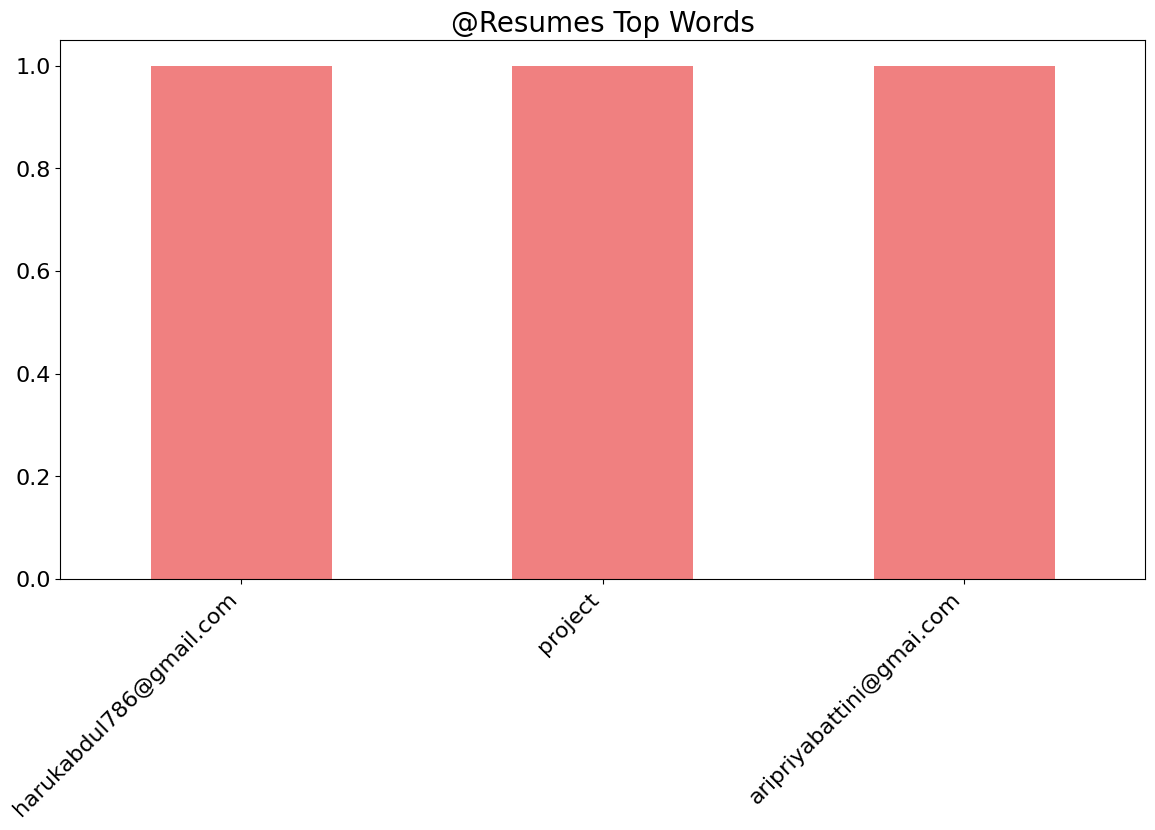

In [35]:
import itertools

c = list(
itertools.chain(
    *data.Resumes.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ") 
                            if '@' in handle.replace(":", "")]).tolist())
)

pd.Series(c).value_counts().head(20).plot.bar(
    figsize=(14, 7), fontsize=16, color='lightcoral'
)
plt.gca().set_title('@Resumes Top Words', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)
pass

In [36]:
#TOKENIZATION

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [38]:
from nltk import word_tokenize
tokens = data.Resumes.map(word_tokenize)

In [39]:
data=[Text.strip() for Text in data.Resumes] # remove both the leading and the trailing characters
data=[Text for Text in data if Text] # removes empty strings, because they are considered in Python as False
data[0:10]

['MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n\n\t   Around 2  years of experience in software design, development, implementation and maintenance of applications using, HTML, CSS, JavaScript, JQuery, PHP, MySQL, React js , Node Js.\n\nKnowledge in Object Oriented PHP Programming.\n\nKnowledge in versioning control like GIT.\n\nInvolved in Responsive web development using Bootstrap.\n\nStrong Analytical, Problem solving skills, Presentation skills and  good team player.\n\nI can work with independently.\n\n\n\n\n\nSCHOLASTICS\n\n                B.Tech (Computer Science Engineering.) from VKR ,VNB & AGK  College of Engineering and Technology,  Gudiwada, affiliated to JNTUK with 76.4% in 2019.\n\nTECHNICAL SKILLS\n\nWeb Technologies\t                :\tHTML, CSS, BOOTSTAP,JAVASCRIPT, JQUERY, \n\n                                                                             PHP, React js , Node js.                                                                              \n\nDatabase\t

In [40]:
review_text=' '.join(data)
review_text[:1000]

'MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n\n\t   Around 2  years of experience in software design, development, implementation and maintenance of applications using, HTML, CSS, JavaScript, JQuery, PHP, MySQL, React js , Node Js.\n\nKnowledge in Object Oriented PHP Programming.\n\nKnowledge in versioning control like GIT.\n\nInvolved in Responsive web development using Bootstrap.\n\nStrong Analytical, Problem solving skills, Presentation skills and  good team player.\n\nI can work with independently.\n\n\n\n\n\nSCHOLASTICS\n\n                B.Tech (Computer Science Engineering.) from VKR ,VNB & AGK  College of Engineering and Technology,  Gudiwada, affiliated to JNTUK with 76.4% in 2019.\n\nTECHNICAL SKILLS\n\nWeb Technologies\t                :\tHTML, CSS, BOOTSTAP,JAVASCRIPT, JQUERY, \n\n                                                                             PHP, React js , Node js.                                                                              \n\nDatabase\t 

In [41]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
review_tokens=tknzr.tokenize(review_text)
print(review_tokens[:100])

['MAREEDU', 'LOKESH', 'BABU', 'PROFESSIONAL', 'OVERVIEW', 'Around', '2', 'years', 'of', 'experience', 'in', 'software', 'design', ',', 'development', ',', 'implementation', 'and', 'maintenance', 'of', 'applications', 'using', ',', 'HTML', ',', 'CSS', ',', 'JavaScript', ',', 'JQuery', ',', 'PHP', ',', 'MySQL', ',', 'React', 'js', ',', 'Node', 'Js', '.', 'Knowledge', 'in', 'Object', 'Oriented', 'PHP', 'Programming', '.', 'Knowledge', 'in', 'versioning', 'control', 'like', 'GIT', '.', 'Involved', 'in', 'Responsive', 'web', 'development', 'using', 'Bootstrap', '.', 'Strong', 'Analytical', ',', 'Problem', 'solving', 'skills', ',', 'Presentation', 'skills', 'and', 'good', 'team', 'player', '.', 'I', 'can', 'work', 'with', 'independently', '.', 'SCHOLASTICS', 'B.Tech', '(', 'Computer', 'Science', 'Engineering', '.', ')', 'from', 'VKR', ',', 'VNB', '&', 'AGK', 'College', 'of', 'Engineering']


In [42]:
review_tokens_text=' '.join(review_tokens)
review_tokens_text[:1000]

'MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Around 2 years of experience in software design , development , implementation and maintenance of applications using , HTML , CSS , JavaScript , JQuery , PHP , MySQL , React js , Node Js . Knowledge in Object Oriented PHP Programming . Knowledge in versioning control like GIT . Involved in Responsive web development using Bootstrap . Strong Analytical , Problem solving skills , Presentation skills and good team player . I can work with independently . SCHOLASTICS B.Tech ( Computer Science Engineering . ) from VKR , VNB & AGK College of Engineering and Technology , Gudiwada , affiliated to JNTUK with 76.4 % in 2019 . TECHNICAL SKILLS Web Technologies : HTML , CSS , BOOTSTAP , JAVASCRIPT , JQUERY , PHP , React js , Node js . Database : MYSQL Operating System : Windows IDE : Visual Studio , NetBeans Code repository Tools : GIT Web Servers : Apache Installers : XAMPP PROJECTs Project # 1 : Name : RMC ( Redimix Concrete ) Duration : Sept 2019 - Til

In [43]:
no_punc_text=review_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Around 2 years of experience in software design  development  implementation and maintenance of applications using  HTML  CSS  JavaScript  JQuery  PHP  MySQL  React js  Node Js  Knowledge in Object Oriented PHP Programming  Knowledge in versioning control like GIT  Involved in Responsive web development using Bootstrap  Strong Analytical  Problem solving skills  Presentation skills and good team player  I can work with independently  SCHOLASTICS BTech  Computer Science Engineering   from VKR  VNB  AGK College of Engineering and Technology  Gudiwada  affiliated to JNTUK with 764  in 2019  TECHNICAL SKILLS Web Technologies  HTML  CSS  BOOTSTAP  JAVASCRIPT  JQUERY  PHP  React js  Node js  Database  MYSQL Operating System  Windows IDE  Visual Studio  NetBeans Code repository Tools  GIT Web Servers  Apache Installers  XAMPP PROJECTs Project  1  Name  RMC  Redimix Concrete  Duration  Sept 2019  Till now Team Size  5 Environment  HTML  CSS  Bootstrap

In [44]:
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text[:1000]

'MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Around 2 years of experience in software design  development  implementation and maintenance of applications using  HTML  CSS  JavaScript  JQuery  PHP  MySQL  React js  Node Js  Knowledge in Object Oriented PHP Programming  Knowledge in versioning control like GIT  Involved in Responsive web development using Bootstrap  Strong Analytical  Problem solving skills  Presentation skills and good team player  I can work with independently  SCHOLASTICS BTech  Computer Science Engineering   from VKR  VNB  AGK College of Engineering and Technology  Gudiwada  affiliated to JNTUK with 764  in 2019  TECHNICAL SKILLS Web Technologies  HTML  CSS  BOOTSTAP  JAVASCRIPT  JQUERY  PHP  React js  Node js  Database  MYSQL Operating System  Windows IDE  Visual Studio  NetBeans Code repository Tools  GIT Web Servers  Apache Installers  XAMPP PROJECTs Project  1  Name  RMC  Redimix Concrete  Duration  Sept 2019  Till now Team Size  5 Environment  HTML  CSS  Bootstrap

In [45]:
import nltk.data
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens[:100])

['MAREEDU', 'LOKESH', 'BABU', 'PROFESSIONAL', 'OVERVIEW', 'Around', '2', 'years', 'of', 'experience', 'in', 'software', 'design', 'development', 'implementation', 'and', 'maintenance', 'of', 'applications', 'using', 'HTML', 'CSS', 'JavaScript', 'JQuery', 'PHP', 'MySQL', 'React', 'js', 'Node', 'Js', 'Knowledge', 'in', 'Object', 'Oriented', 'PHP', 'Programming', 'Knowledge', 'in', 'versioning', 'control', 'like', 'GIT', 'Involved', 'in', 'Responsive', 'web', 'development', 'using', 'Bootstrap', 'Strong', 'Analytical', 'Problem', 'solving', 'skills', 'Presentation', 'skills', 'and', 'good', 'team', 'player', 'I', 'can', 'work', 'with', 'independently', 'SCHOLASTICS', 'BTech', 'Computer', 'Science', 'Engineering', 'from', 'VKR', 'VNB', 'AGK', 'College', 'of', 'Engineering', 'and', 'Technology', 'Gudiwada', 'affiliated', 'to', 'JNTUK', 'with', '764', 'in', '2019', 'TECHNICAL', 'SKILLS', 'Web', 'Technologies', 'HTML', 'CSS', 'BOOTSTAP', 'JAVASCRIPT', 'JQUERY', 'PHP', 'React', 'js', 'Node']


In [46]:
len(text_tokens)

57228

In [47]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['MAREEDU', 'LOKESH', 'BABU', 'PROFESSIONAL', 'OVERVIEW', 'Around', '2', 'years', 'experience', 'software', 'design', 'development', 'implementation', 'maintenance', 'applications', 'using', 'HTML', 'CSS', 'JavaScript', 'JQuery', 'PHP', 'MySQL', 'React', 'js', 'Node', 'Js', 'Knowledge', 'Object', 'Oriented', 'PHP', 'Programming', 'Knowledge', 'versioning', 'control', 'like', 'GIT', 'Involved', 'Responsive', 'web', 'development', 'using', 'Bootstrap', 'Strong', 'Analytical', 'Problem', 'solving', 'skills', 'Presentation', 'skills', 'good', 'team', 'player', 'I', 'work', 'independently', 'SCHOLASTICS', 'BTech', 'Computer', 'Science', 'Engineering', 'VKR', 'VNB', 'AGK', 'College', 'Engineering', 'Technology', 'Gudiwada', 'affiliated', 'JNTUK', '764', '2019', 'TECHNICAL', 'SKILLS', 'Web', 'Technologies', 'HTML', 'CSS', 'BOOTSTAP', 'JAVASCRIPT', 'JQUERY', 'PHP', 'React', 'js', 'Node', 'js', 'Database', 'MYSQL', 'Operating', 'System', 'Windows', 'IDE', 'Visual', 'Studio', 'NetBeans', 'Code',

In [48]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])

['mareedu', 'lokesh', 'babu', 'professional', 'overview', 'around', '2', 'years', 'experience', 'software', 'design', 'development', 'implementation', 'maintenance', 'applications', 'using', 'html', 'css', 'javascript', 'jquery', 'php', 'mysql', 'react', 'js', 'node', 'js', 'knowledge', 'object', 'oriented', 'php', 'programming', 'knowledge', 'versioning', 'control', 'like', 'git', 'involved', 'responsive', 'web', 'development', 'using', 'bootstrap', 'strong', 'analytical', 'problem', 'solving', 'skills', 'presentation', 'skills', 'good', 'team', 'player', 'i', 'work', 'independently', 'scholastics', 'btech', 'computer', 'science', 'engineering', 'vkr', 'vnb', 'agk', 'college', 'engineering', 'technology', 'gudiwada', 'affiliated', 'jntuk', '764', '2019', 'technical', 'skills', 'web', 'technologies', 'html', 'css', 'bootstap', 'javascript', 'jquery', 'php', 'react', 'js', 'node', 'js', 'database', 'mysql', 'operating', 'system', 'windows', 'ide', 'visual', 'studio', 'netbeans', 'code',

In [49]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['mareedu', 'lokesh', 'babu', 'profession', 'overview', 'around', '2', 'year', 'experi', 'softwar', 'design', 'develop', 'implement', 'mainten', 'applic', 'use', 'html', 'css', 'javascript', 'jqueri', 'php', 'mysql', 'react', 'js', 'node', 'js', 'knowledg', 'object', 'orient', 'php', 'program', 'knowledg', 'version', 'control', 'like', 'git', 'involv', 'respons', 'web', 'develop', 'use', 'bootstrap', 'strong', 'analyt', 'problem', 'solv', 'skill', 'present', 'skill', 'good', 'team', 'player', 'i', 'work', 'independ', 'scholast', 'btech', 'comput', 'scienc', 'engin', 'vkr', 'vnb', 'agk', 'colleg', 'engin', 'technolog', 'gudiwada', 'affili', 'jntuk', '764', '2019', 'technic', 'skill', 'web', 'technolog', 'html', 'css', 'bootstap', 'javascript', 'jqueri', 'php', 'react', 'js', 'node', 'js', 'databas', 'mysql', 'oper', 'system', 'window', 'ide', 'visual', 'studio', 'netbean', 'code', 'repositori', 'tool', 'git', 'web', 'server']


In [50]:
!pip install -U spacy --user
!python -m spacy download en_core_web_sm 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-04-03 04:16:55.634912: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-03 04:16:57.639534: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [51]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_words))
print(doc[:100])


mareedu lokesh babu professional overview around 2 years experience software design development implementation maintenance applications using html css javascript jquery php mysql react js node js knowledge object oriented php programming knowledge versioning control like git involved responsive web development using bootstrap strong analytical problem solving skills presentation skills good team player i work independently scholastics btech computer science engineering vkr vnb agk college engineering technology gudiwada affiliated jntuk 764 2019 technical skills web technologies html css bootstap javascript jquery php react js node js database mysql operating system windows ide visual studio netbeans code repository tools git web servers


In [52]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['mareedu', 'lokesh', 'babu', 'professional', 'overview', 'around', '2', 'year', 'experience', 'software', 'design', 'development', 'implementation', 'maintenance', 'application', 'use', 'html', 'css', 'javascript', 'jquery', 'php', 'mysql', 'react', 'js', 'node', 'js', 'knowledge', 'object', 'orient', 'php', 'programming', 'knowledge', 'versione', 'control', 'like', 'git', 'involve', 'responsive', 'web', 'development', 'use', 'bootstrap', 'strong', 'analytical', 'problem', 'solve', 'skill', 'presentation', 'skill', 'good', 'team', 'player', 'I', 'work', 'independently', 'scholastic', 'btech', 'computer', 'science', 'engineering', 'vkr', 'vnb', 'agk', 'college', 'engineering', 'technology', 'gudiwada', 'affiliate', 'jntuk', '764', '2019', 'technical', 'skill', 'web', 'technology', 'html', 'css', 'bootstap', 'javascript', 'jquery', 'php', 'react', 'js', 'node', 'js', 'database', 'mysql', 'operating', 'system', 'window', 'ide', 'visual', 'studio', 'netbean', 'code', 'repository', 'tool',

In [53]:
clean_review=' '.join(lemmas)
clean_review[:1000]

'mareedu lokesh babu professional overview around 2 year experience software design development implementation maintenance application use html css javascript jquery php mysql react js node js knowledge object orient php programming knowledge versione control like git involve responsive web development use bootstrap strong analytical problem solve skill presentation skill good team player I work independently scholastic btech computer science engineering vkr vnb agk college engineering technology gudiwada affiliate jntuk 764 2019 technical skill web technology html css bootstap javascript jquery php react js node js database mysql operating system window ide visual studio netbean code repository tool git web server apache installers xampp project project 1 name rmc redimix concrete duration sept 2019 till team size 5 environment html css bootstrap mysql react js node js description it product build instant redimix concrete rmc this product relate construction industry supply redimix co

In [54]:
data = pd.read_csv("Resume.csv")
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [55]:
data['Clean_Resumes'] = np.vectorize(remove_pattern)(data['Resumes'], "@[\w]*")
data.head(10)

,Resumes,Category,Clean_Resumes
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer \n\nNAME: KRI...
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG \n\nSeeking a challenging po...
5,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...
6,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...
7,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...
9,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P \n\n\n\n ...


In [56]:
clean_Resumes = []

for index, row in data.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Resumes.split() if 'http' not in word]
    clean_Resumes.append(' '.join(words_without_links))

data['Clean_Resumes'] = clean_Resumes
data.head(10)

,Resumes,Category,Clean_Resumes
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
5,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume,KAMBALA SAI SURENDRA SUMMARY PROJECT    Hav...
6,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,Kotani Durga Prasad Objective: Aspirant for a ...
7,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,Pranish Sonone Career summary: Experience of 1...
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
9,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...


In [57]:
data = data[data['Clean_Resumes']!='']
data.head(10)

,Resumes,Category,Clean_Resumes
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
5,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume,KAMBALA SAI SURENDRA SUMMARY PROJECT    Hav...
6,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,Kotani Durga Prasad Objective: Aspirant for a ...
7,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,Pranish Sonone Career summary: Experience of 1...
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
9,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...


In [58]:
data.drop_duplicates(subset=['Clean_Resumes'], keep=False)
data.head(10)

,Resumes,Category,Clean_Resumes
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
5,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume,KAMBALA SAI SURENDRA SUMMARY PROJECT    Hav...
6,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,Kotani Durga Prasad Objective: Aspirant for a ...
7,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,Pranish Sonone Career summary: Experience of 1...
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
9,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...


In [59]:
data = data.reset_index(drop=True)
data.head(10)

,Resumes,Category,Clean_Resumes
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,MAREEDU LOKESH BABU PROFESSIONAL OVERVIEW Arou...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,PRAGNYA PATTNAIK Expertise: Having around 2 ye...
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
5,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume,KAMBALA SAI SURENDRA SUMMARY PROJECT    Hav...
6,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,Kotani Durga Prasad Objective: Aspirant for a ...
7,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,Pranish Sonone Career summary: Experience of 1...
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
9,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,Name: Ravali P Curriculum Vitae Specialization...


In [60]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('!', '',text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('⇨', '',text)
    text = re.sub(':', '',text)
    text = re.sub('•', '',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [61]:
data['Clean_Resumes'] = data['Clean_Resumes'].apply(lambda x: clean_text(x))
data.head(10)

,Resumes,Category,Clean_Resumes
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,mareedu lokesh babu professional overview arou...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,pragnya pattnaik expertise having around year...
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...
5,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume,kambala sai surendra summary project    hav...
6,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,kotani durga prasad objective aspirant for a p...
7,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,pranish sonone career summary experience of y...
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...
9,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...


In [62]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [63]:
data['Clean_Resumes']=data['Clean_Resumes'].apply(lambda x: remove_emoji(x))
data.head(10)

,Resumes,Category,Clean_Resumes
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,mareedu lokesh babu professional overview arou...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,pragnya pattnaik expertise having around year...
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...
5,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume,kambala sai surendra summary project having...
6,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,kotani durga prasad objective aspirant for a p...
7,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,pranish sonone career summary experience of y...
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...
9,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...


In [64]:
data['Tokenized_Resumes'] = data['Clean_Resumes'].apply(lambda x: nltk.word_tokenize(x))
data.head(10)

,Resumes,Category,Clean_Resumes,Tokenized_Resumes
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,mareedu lokesh babu professional overview arou...,"[mareedu, lokesh, babu, professional, overview..."
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...,"[uideveloper, react, js, developer, name, kris..."
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,pragnya pattnaik expertise having around year...,"[pragnya, pattnaik, expertise, having, around,..."
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...,"[naveen, sadhu, title, software, developer, lo..."
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,"[susovan, bag, seeking, a, challenging, positi..."
5,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume,kambala sai surendra summary project having...,"[kambala, sai, surendra, summary, project, hav..."
6,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,kotani durga prasad objective aspirant for a p...,"[kotani, durga, prasad, objective, aspirant, f..."
7,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,pranish sonone career summary experience of y...,"[pranish, sonone, career, summary, experience,..."
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...,"[md, khizaruddin, rauf, experience, currently,..."
9,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...,"[name, ravali, p, curriculum, vitae, specializ..."


In [65]:
data.drop(['Tokenized_Resumes'],axis=1,inplace=True)

In [66]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

cleaned_resumes = []

for index, row in data.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Resumes.split()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_resumes.append(' '.join(words_without_stopwords))
    
data['Absolute_Clean_Resumes'] = cleaned_resumes
data.head(10)

,Resumes,Category,Clean_Resumes,Absolute_Clean_Resumes
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,mareedu lokesh babu professional overview arou...,mareedu lokesh babu professional overview arou...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,pragnya pattnaik expertise having around year...,pragnya pattnaik expertise having around years...
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...,naveen sadhu title software developer location...
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,susovan bag seeking a challenging position in ...
5,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume,kambala sai surendra summary project having...,kambala sai surendra summary project having ba...
6,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,kotani durga prasad objective aspirant for a p...,kotani durga prasad objective aspirant for a p...
7,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,pranish sonone career summary experience of y...,pranish sonone career summary experience of ye...
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...,md khizaruddin rauf experience currently worki...
9,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...


In [67]:
Tokenized_Resume = data['Absolute_Clean_Resumes'].apply(lambda x: x.split())
Tokenized_Resume.head(10)

0    [mareedu, lokesh, babu, professional, overview...
1    [uideveloper, react, js, developer, name, kris...
2    [pragnya, pattnaik, expertise, having, around,...
3    [naveen, sadhu, title, software, developer, lo...
4    [susovan, bag, seeking, a, challenging, positi...
5    [kambala, sai, surendra, summary, project, hav...
6    [kotani, durga, prasad, objective, aspirant, f...
7    [pranish, sonone, career, summary, experience,...
8    [md, khizaruddin, rauf, experience, currently,...
9    [name, ravali, p, curriculum, vitae, specializ...
Name: Absolute_Clean_Resumes, dtype: object

In [68]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

Tokenized_Resumes = Tokenized_Resume.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
Tokenized_Resumes.head(10)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0    [mareedu, lokesh, babu, professional, overview...
1    [uideveloper, react, j, developer, name, krish...
2    [pragnya, pattnaik, expertise, having, around,...
3    [naveen, sadhu, title, software, developer, lo...
4    [susovan, bag, seeking, a, challenging, positi...
5    [kambala, sai, surendra, summary, project, hav...
6    [kotani, durga, prasad, objective, aspirant, f...
7    [pranish, sonone, career, summary, experience,...
8    [md, khizaruddin, rauf, experience, currently,...
9    [name, ravali, p, curriculum, vitae, specializ...
Name: Absolute_Clean_Resumes, dtype: object

In [69]:
for i, tokens in enumerate(Tokenized_Resume):
    Tokenized_Resume[i] = ' '.join(tokens)

data['Absolute_Clean_Resumes'] = Tokenized_Resume
data.head(10)

,Resumes,Category,Clean_Resumes,Absolute_Clean_Resumes
0,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer Resume,mareedu lokesh babu professional overview arou...,mareedu lokesh babu professional overview arou...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer Resume,pragnya pattnaik expertise having around year...,pragnya pattnaik expertise having around years...
3,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...,naveen sadhu title software developer location...
4,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,susovan bag seeking a challenging position in ...
5,KAMBALA SAI SURENDRA \n\n \n\n \n\n \n\n\n\n...,React JS Developer Resume,kambala sai surendra summary project having...,kambala sai surendra summary project having ba...
6,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,kotani durga prasad objective aspirant for a p...,kotani durga prasad objective aspirant for a p...
7,Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...,React JS Developer Resume,pranish sonone career summary experience of y...,pranish sonone career summary experience of ye...
8,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...,md khizaruddin rauf experience currently worki...
9,Name: Ravali P \n\n\n\n ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...,name ravali p curriculum vitae specialization ...


In [72]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=b47ae8a941f772b9b76b95213e5799d6d96eb3f3a72f82702b3cd8cc98303594
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement CountVectorizer (from versions: none)
ERROR: No matching distribution found for CountVectorizer


In [73]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
review_cv=cv.fit_transform(lemmas)
feature_names = cv.get_feature_names()

AttributeError: ignored

In [ ]:
print(cv.get_feature_names()[100:2000])

In [ ]:
print(cv.get_feature_names()[:4000])

In [75]:
print(review_cv.toarray()[100:2000])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [76]:
print(review_cv.toarray().shape)

(44597, 4342)


In [77]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=4000)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [ ]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [78]:
data.drop(['Resumes','Clean_Resumes'],axis=1,inplace=True)
data

,Category,Absolute_Clean_Resumes
0,React JS Developer Resume,mareedu lokesh babu professional overview arou...
1,React JS Developer Resume,uideveloper react js developer name krishna pr...
2,React JS Developer Resume,pragnya pattnaik expertise having around years...
3,React JS Developer Resume,naveen sadhu title software developer location...
4,React JS Developer Resume,susovan bag seeking a challenging position in ...
...,...,...
74,Workday Resume,name naresh babu cherukuri objective to take u...
75,Workday Resume,punugoti swetha workday technical consultant p...
76,Workday Resume,shireesh balasani hcm consultant profile summa...
77,Workday Resume,workday integration consultant name sri krishn...


In [79]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Absolute_Clean_Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 599), ('peoplesoft', 443), ('workday', 428), ('application', 417), ('using', 395), ('server', 351), ('data', 331), ('reports', 322), ('project', 306), ('business', 269), ('web', 242), ('database', 238), ('sql', 238), ('process', 233), ('worked', 220), ('knowledge', 210), ('client', 192), ('involved', 190), ('system', 190), ('tools', 190), ('integrations', 187), ('integration', 181), ('like', 180), ('support', 175), ('hcm', 173), ('skills', 172), ('good', 169), ('development', 163), ('team', 163), ('creating', 163), ('technical', 161), ('working', 161), ('people', 160), ('design', 152), ('servers', 151), ('services', 151), ('testing', 150), ('created', 150), ('report', 150), ('various', 146), ('responsibilities', 144), ('role', 139), ('environment', 138), ('developer', 138), ('security', 133), ('oracle', 133), ('management', 132), ('production', 130), ('issues', 129), ('studio', 127), ('eib', 127), ('’', 125), ('work', 124), ('core', 122), ('custom', 118), ('react', 117)

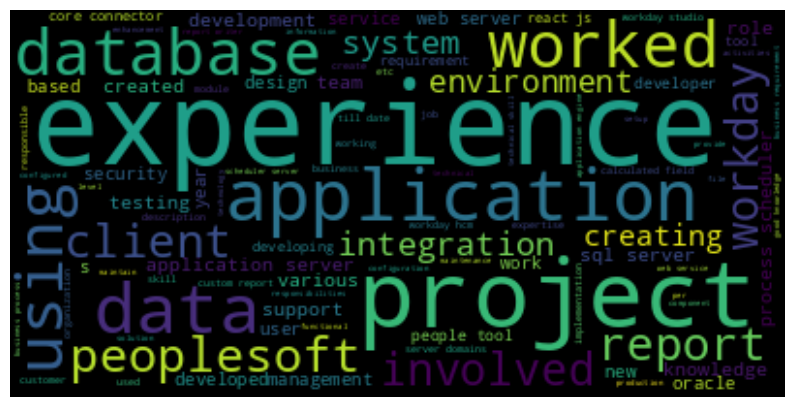

In [80]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [81]:
categories = np.sort(data['Category'].unique())
categories

array(['PeopleSoft resume', 'React JS Developer Resume',
       'SQL Developer Lightning Insight Resume', 'Workday Resume'],
      dtype=object)

In [82]:
data_categories = [data[data['Category'] == category].loc[:, ['Absolute_Clean_Resumes', 'Category']] for category in categories]
data_categories

[                               Absolute_Clean_Resumes           Category
 24  hari narayana professional summary having year...  PeopleSoft resume
 25  peoplesoft administration vivekanand sayana ca...  PeopleSoft resume
 26  murali professional summary having years of ex...  PeopleSoft resume
 27  priyabrata hota career objective pursuing peop...  PeopleSoft resume
 28  anubhav kumar singh core competencies scriptin...  PeopleSoft resume
 29  tanna sujatha objective seeking a challenging ...  PeopleSoft resume
 30  sirazuddin m bangalore india sirazuddin m bang...  PeopleSoft resume
 31  peoplesoft admin varkala vikas career objectiv...  PeopleSoft resume
 32  c o n t a c t address manyata tech park nagava...  PeopleSoft resume
 33  classification internal classification interna...  PeopleSoft resume
 34  g ananda rayudu g ananda rayudu profile summar...  PeopleSoft resume
 35  priyanka ramadoss mountpleasant coonoor the ni...  PeopleSoft resume
 36  peoplesoft administrator srinivas

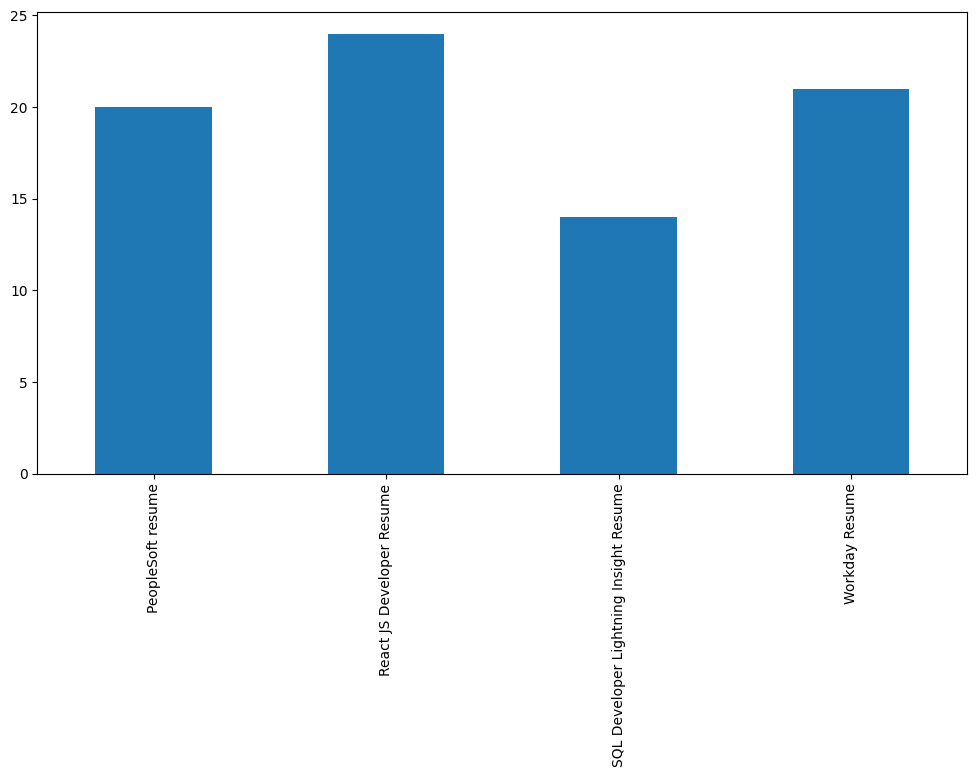

In [83]:
data['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [84]:
def wordcloud(df):
    txt = ' '.join(txt for txt in data['Absolute_Clean_Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

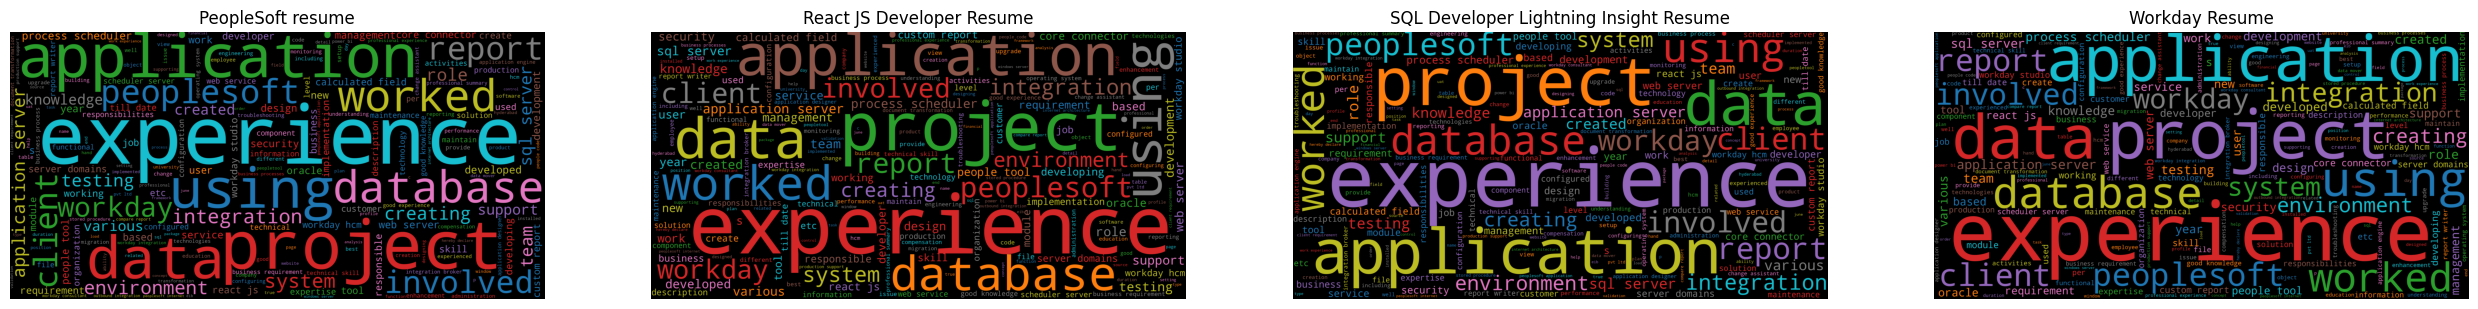

In [85]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline
plt.figure(figsize=(40, 28))

for i, category in enumerate(categories):
    wc = wordcloud(data_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()

In [86]:
def wordfreq(df):
    count = data['Absolute_Clean_Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

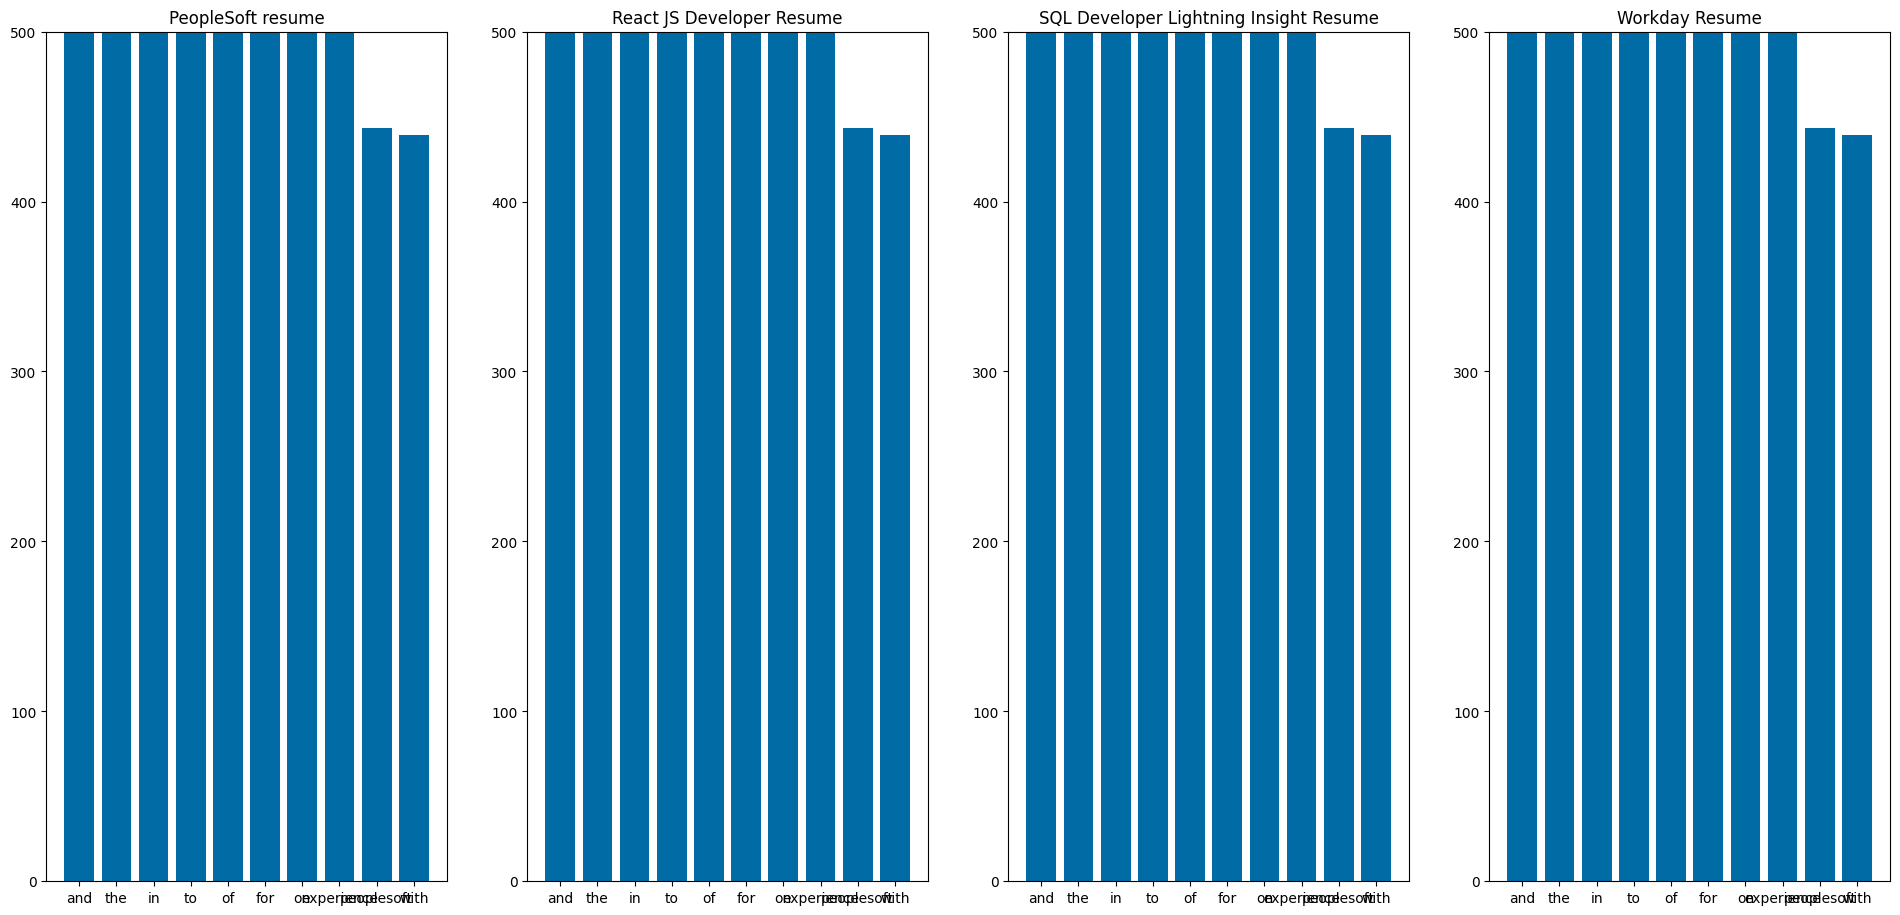

In [87]:
fig = plt.figure(figsize=(30, 64))

for i, category in enumerate(categories):
    wf = wordfreq(data_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 500)

plt.show()
plt.close()

In [88]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [89]:
data

,Category,Absolute_Clean_Resumes
0,1,mareedu lokesh babu professional overview arou...
1,1,uideveloper react js developer name krishna pr...
2,1,pragnya pattnaik expertise having around years...
3,1,naveen sadhu title software developer location...
4,1,susovan bag seeking a challenging position in ...
...,...,...
74,3,name naresh babu cherukuri objective to take u...
75,3,punugoti swetha workday technical consultant p...
76,3,shireesh balasani hcm consultant profile summa...
77,3,workday integration consultant name sri krishn...


In [90]:
data.Category.value_counts()

1    24
3    21
0    20
2    14
Name: Category, dtype: int64

In [92]:
import seaborn as sns

<Figure size 10000x5000 with 0 Axes>

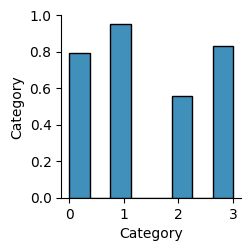

In [93]:
plt.figure(figsize=(20,10),dpi=500)
sns.pairplot(data = data)

<Axes: xlabel='count', ylabel='Category'>

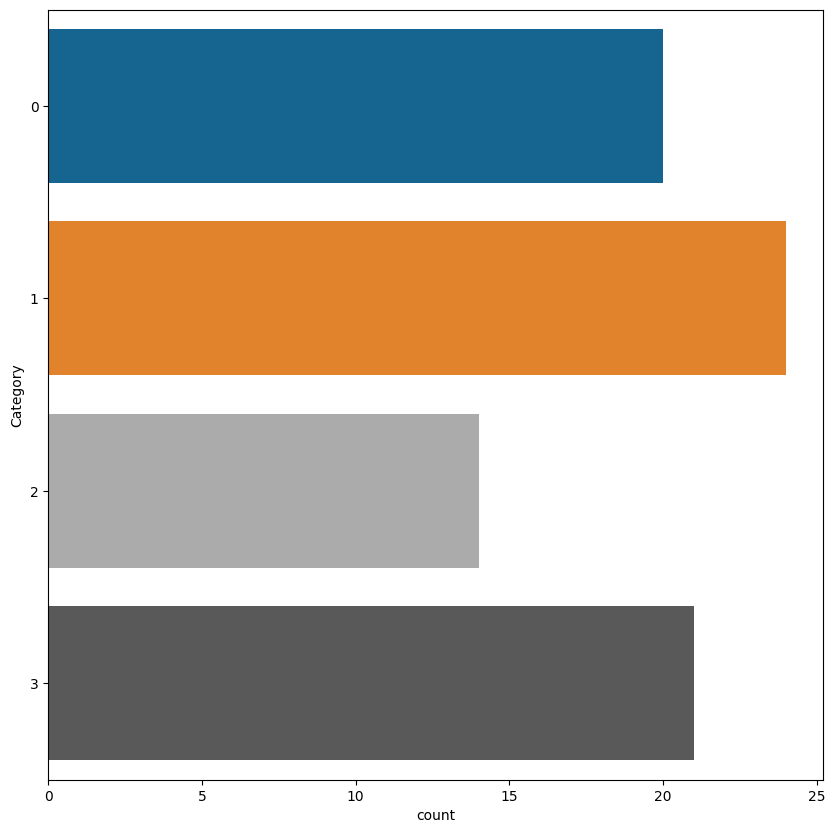

In [94]:
plt.figure(figsize=(10,10))
plt.xticks()
sns.countplot(y="Category", data=data)

In [95]:
targetCounts = data['Category'].value_counts().reset_index()['Category']
targetLabels  = data['Category'].value_counts().reset_index()['index']

In [96]:
targetCounts

0    24
1    21
2    20
3    14
Name: Category, dtype: int64

In [97]:
targetLabels

0    1
1    3
2    0
3    2
Name: index, dtype: int64

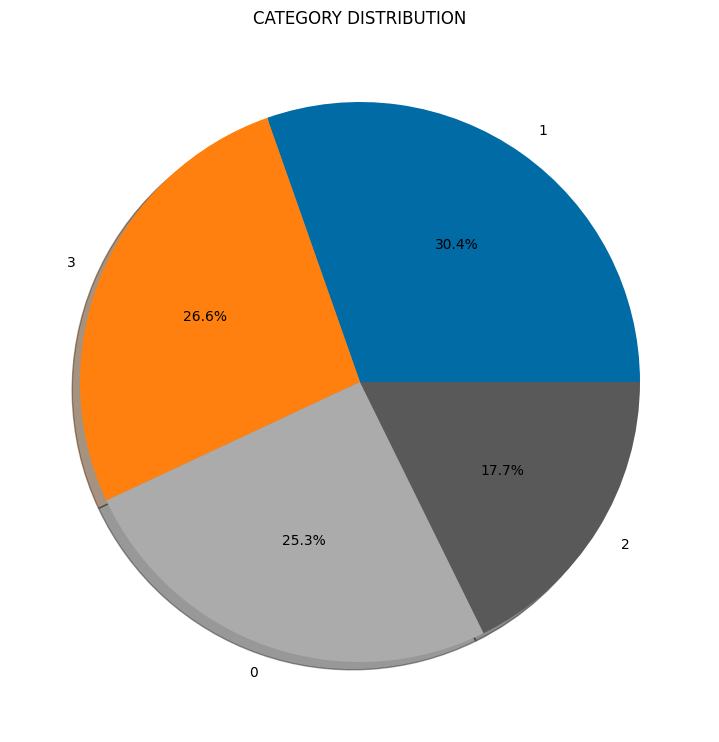

In [98]:
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(20,20))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
requiredText = data['Absolute_Clean_Resumes'].values
requiredTarget = data['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=45, test_size=0.20,stratify=requiredTarget)
X_train.shape, X_test.shape

((63, 4726), (16, 4726))

In [101]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [102]:
## Model Building

In [103]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [104]:
predict1 = lg.predict(X_test)

In [105]:
accuracy_1 = accuracy_score(y_test,predict1)
accuracy_1

0.9375

In [106]:
cm = confusion_matrix(y_test,predict1)
cm

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'Truth')

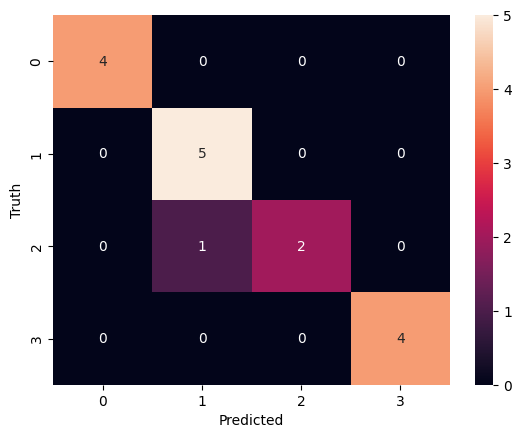

In [107]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [108]:
accuracy_1 = round(accuracy_score(y_test,predict1),4)
precision_1 = round(precision_score(y_test,predict1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,predict1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,predict1, average = 'macro'),4)

In [109]:
print('Accuracy Score  : ', accuracy_1)
print('Precision Score : ', precision_1)
print('Recall Score    : ', recall_1)
print('f1-Score        : ', f1_1)

Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9167
f1-Score        :  0.9273


SVM

In [112]:
sv = SVC()
sv.fit(X_train,y_train)
predict2 = sv.predict(X_test)

In [113]:
accuracy_2 = accuracy_score(y_test,predict2)
accuracy_2

0.875

In [114]:
cm2 = confusion_matrix(y_test,predict2)
cm2

array([[3, 1, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'Truth')

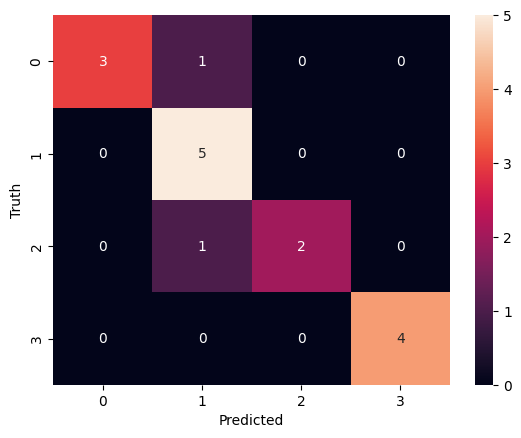

In [115]:
sns.heatmap(cm2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [118]:
from sklearn.metrics import classification_report

In [119]:
print(classification_report(y_test,predict2))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.71      1.00      0.83         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.93      0.85      0.87        16
weighted avg       0.91      0.88      0.87        16



In [120]:
accuracy_2 = round(accuracy_score(y_test,predict2),4)
precision_2 = round(precision_score(y_test,predict2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,predict2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,predict2, average = 'macro'),4)

In [121]:
print('Accuracy Score  : ', accuracy_2)
print('Precision Score : ', precision_2)
print('Recall Score    : ', recall_2)
print('f1-Score        : ', f1_2)

Accuracy Score  :  0.875
Precision Score :  0.9286
Recall Score    :  0.8542
f1-Score        :  0.8726


Random Forest Classifier


In [123]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict3=rf.predict(X_test)

In [124]:
accuracy_3 = accuracy_score(y_test,predict3)
accuracy_3

1.0

In [125]:
cm3 = confusion_matrix(y_test,predict3)
cm3

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'Truth')

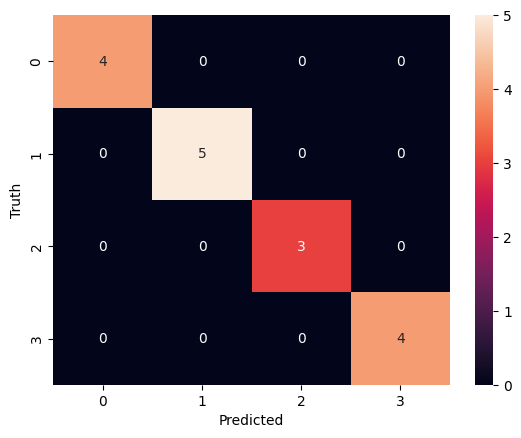

In [126]:
sns.heatmap(cm3,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [127]:
print(classification_report(y_test,predict3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [128]:
accuracy_3 = round(accuracy_score(y_test,predict3),4)
precision_3 = round(precision_score(y_test,predict3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,predict3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,predict3, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


Naive-Bayes Classifier

In [129]:
nb=MultinomialNB()
nb.fit(X_train,y_train)
predict4=nb.predict(X_test)

In [130]:
accuracy_4 = accuracy_score(y_test,predict4)
accuracy_4

0.875

In [131]:
cm4=confusion_matrix(y_test,predict4)
cm4

array([[3, 0, 0, 1],
       [0, 5, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'Truth')

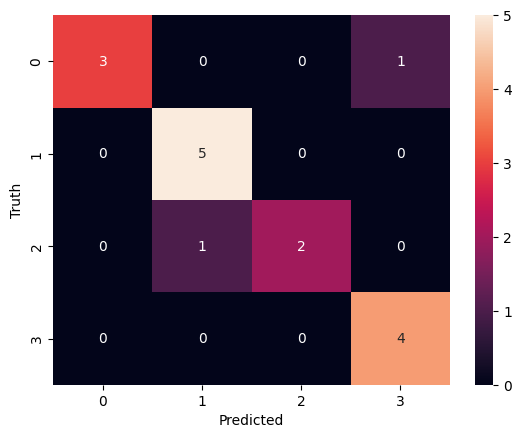

In [132]:
sns.heatmap(cm4,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [133]:
print(classification_report(y_test,predict4))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       0.80      1.00      0.89         4

    accuracy                           0.88        16
   macro avg       0.91      0.85      0.86        16
weighted avg       0.90      0.88      0.87        16



In [134]:
accuracy_4 = round(accuracy_score(y_test,predict4),4)
precision_4 = round(precision_score(y_test,predict4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,predict4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,predict4, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)

Accuracy Score  :  0.875
Precision Score :  0.9083
Recall Score    :  0.8542
f1-Score        :  0.8638


Decision Tree Classifier

In [135]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
predict5=dt.predict(X_test)

In [136]:
accuracy_5 = accuracy_score(y_test,predict5)
accuracy_5

1.0

In [137]:
cm5=confusion_matrix(y_test,predict5)
cm5

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'Truth')

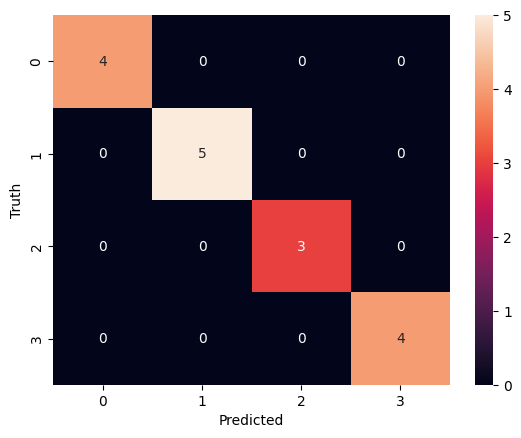

In [138]:
sns.heatmap(cm5,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [139]:
print(classification_report(y_test,predict5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [140]:
accuracy_5 = round(accuracy_score(y_test,predict5),4)
precision_5 = round(precision_score(y_test,predict5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,predict5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,predict5, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


AdaBoost Classifier

In [141]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
predict6=ab.predict(X_test)

In [142]:
accuracy_6 = accuracy_score(y_test,predict6)
accuracy_6

0.75

In [143]:
cm6 = confusion_matrix(y_test,predict6)
cm6

array([[0, 4, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'Truth')

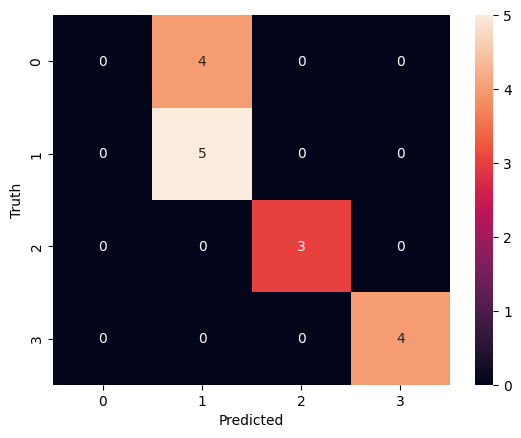

In [144]:
sns.heatmap(cm6,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [145]:
print(classification_report(y_test,predict6))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.56      1.00      0.71         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           0.75        16
   macro avg       0.64      0.75      0.68        16
weighted avg       0.61      0.75      0.66        16



In [146]:
accuracy_6 = round(accuracy_score(y_test,predict6),4)
precision_6 = round(precision_score(y_test,predict6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,predict6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,predict6, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)

Accuracy Score  :  0.75
Precision Score :  0.6389
Recall Score    :  0.75
f1-Score        :  0.6786


GradientBoosting Classifier

In [147]:
gd = GradientBoostingClassifier()
gd.fit(X_train,y_train)
predict7 = gd.predict(X_test)

In [148]:
accuracy_7 = accuracy_score(y_test,predict7)
accuracy_7

1.0

In [149]:
cm7 = confusion_matrix(y_test,predict7)
cm7

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'Truth')

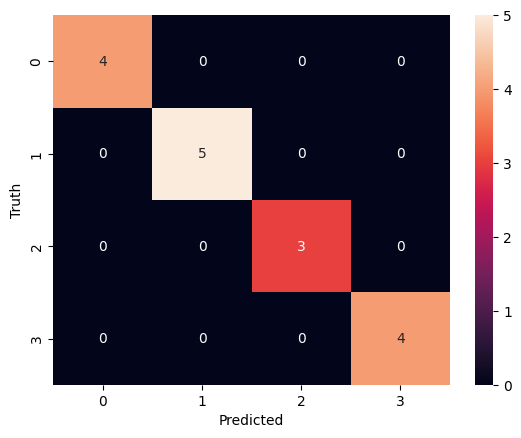

In [150]:
sns.heatmap(cm7,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [153]:
print(classification_report(y_test,predict7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [154]:
accuracy_7 = round(accuracy_score(y_test,predict7),4)
precision_7 = round(precision_score(y_test,predict7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,predict7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,predict7, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


XGBoost Classifier

In [155]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
predict8 = xg.predict(X_test)

In [156]:
accuracy_8 = accuracy_score(y_test,predict8)
accuracy_8

1.0

In [157]:
cm8 = confusion_matrix(y_test,predict8)
cm8

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'Truth')

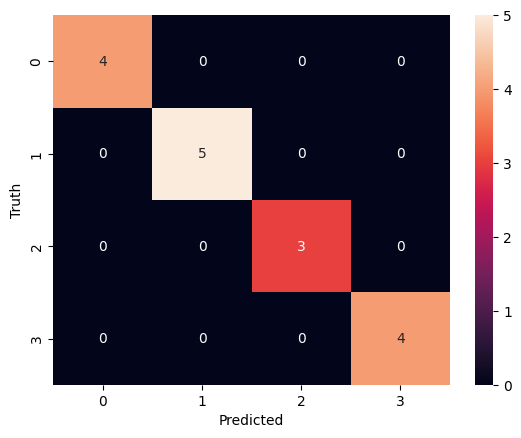

In [158]:
sns.heatmap(cm8,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [159]:
print(classification_report(y_test,predict8))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [160]:
accuracy_8 = round(accuracy_score(y_test,predict8),4)
precision_8 = round(precision_score(y_test,predict8,average = 'macro'),4)
recall_8 = round(recall_score(y_test,predict8, average = 'macro'),4)
f1_8 = round(f1_score(y_test,predict8, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_8)
print('Precision Score : ', precision_8)
print('Recall Score    : ', recall_8)
print('f1-Score        : ', f1_8)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


LGBM-Boosting Classifier

In [161]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
predict9 = lgbm.predict(X_test)

In [162]:
accuracy_9 = accuracy_score(y_test,predict9)
accuracy_9

0.9375

In [163]:
cm9 = confusion_matrix(y_test,predict9)
cm9

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 0, 4]])

Text(50.722222222222214, 0.5, 'Truth')

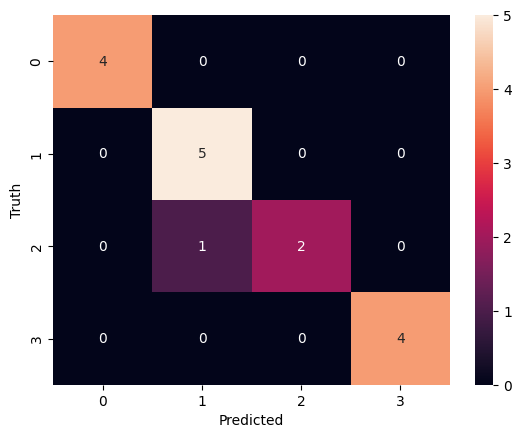

In [164]:
sns.heatmap(cm9,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [165]:
print(classification_report(y_test,predict9))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      1.00      0.91         5
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4

    accuracy                           0.94        16
   macro avg       0.96      0.92      0.93        16
weighted avg       0.95      0.94      0.93        16



In [166]:
accuracy_9 = round(accuracy_score(y_test,predict9),4)
precision_9 = round(precision_score(y_test,predict9,average = 'macro'),4)
recall_9 = round(recall_score(y_test,predict9, average = 'macro'),4)
f1_9 = round(f1_score(y_test,predict9, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_9)
print('Precision Score : ', precision_9)
print('Recall Score    : ', recall_9)
print('f1-Score        : ', f1_9)

Accuracy Score  :  0.9375
Precision Score :  0.9583
Recall Score    :  0.9167
f1-Score        :  0.9273


In [167]:
table = {'Classifier' : ['Logistic Regression','SVM Classifier','Random Forest Classifier', 'Naive-Bayes Classifier','Decision Tree Classifier','AdaBoost Classifier', 'Gradient Boosting Classifier', 'Xtreme Gradient Boosting Classifier', 'Light Gradient Boosting Classifier'], 'Accuracy' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7, accuracy_8, accuracy_9], 'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7, precision_8, precision_9], 'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7, recall_8, recall_9], 'F1_Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7, f1_8, f1_9]}
table = pd.DataFrame(table)
table.sort_values(["Accuracy"],inplace = True, ignore_index=True)
table

,Classifier,Accuracy,Precision Score,Recall Score,F1_Score
0,AdaBoost Classifier,0.7500,0.6389,0.7500,0.6786
1,SVM Classifier,0.8750,0.9286,0.8542,0.8726
2,Naive-Bayes Classifier,0.8750,0.9083,0.8542,0.8638
3,Logistic Regression,0.9375,0.9583,0.9167,0.9273
4,Light Gradient Boosting Classifier,0.9375,0.9583,0.9167,0.9273
5,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000
6,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000
7,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000
8,Xtreme Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000


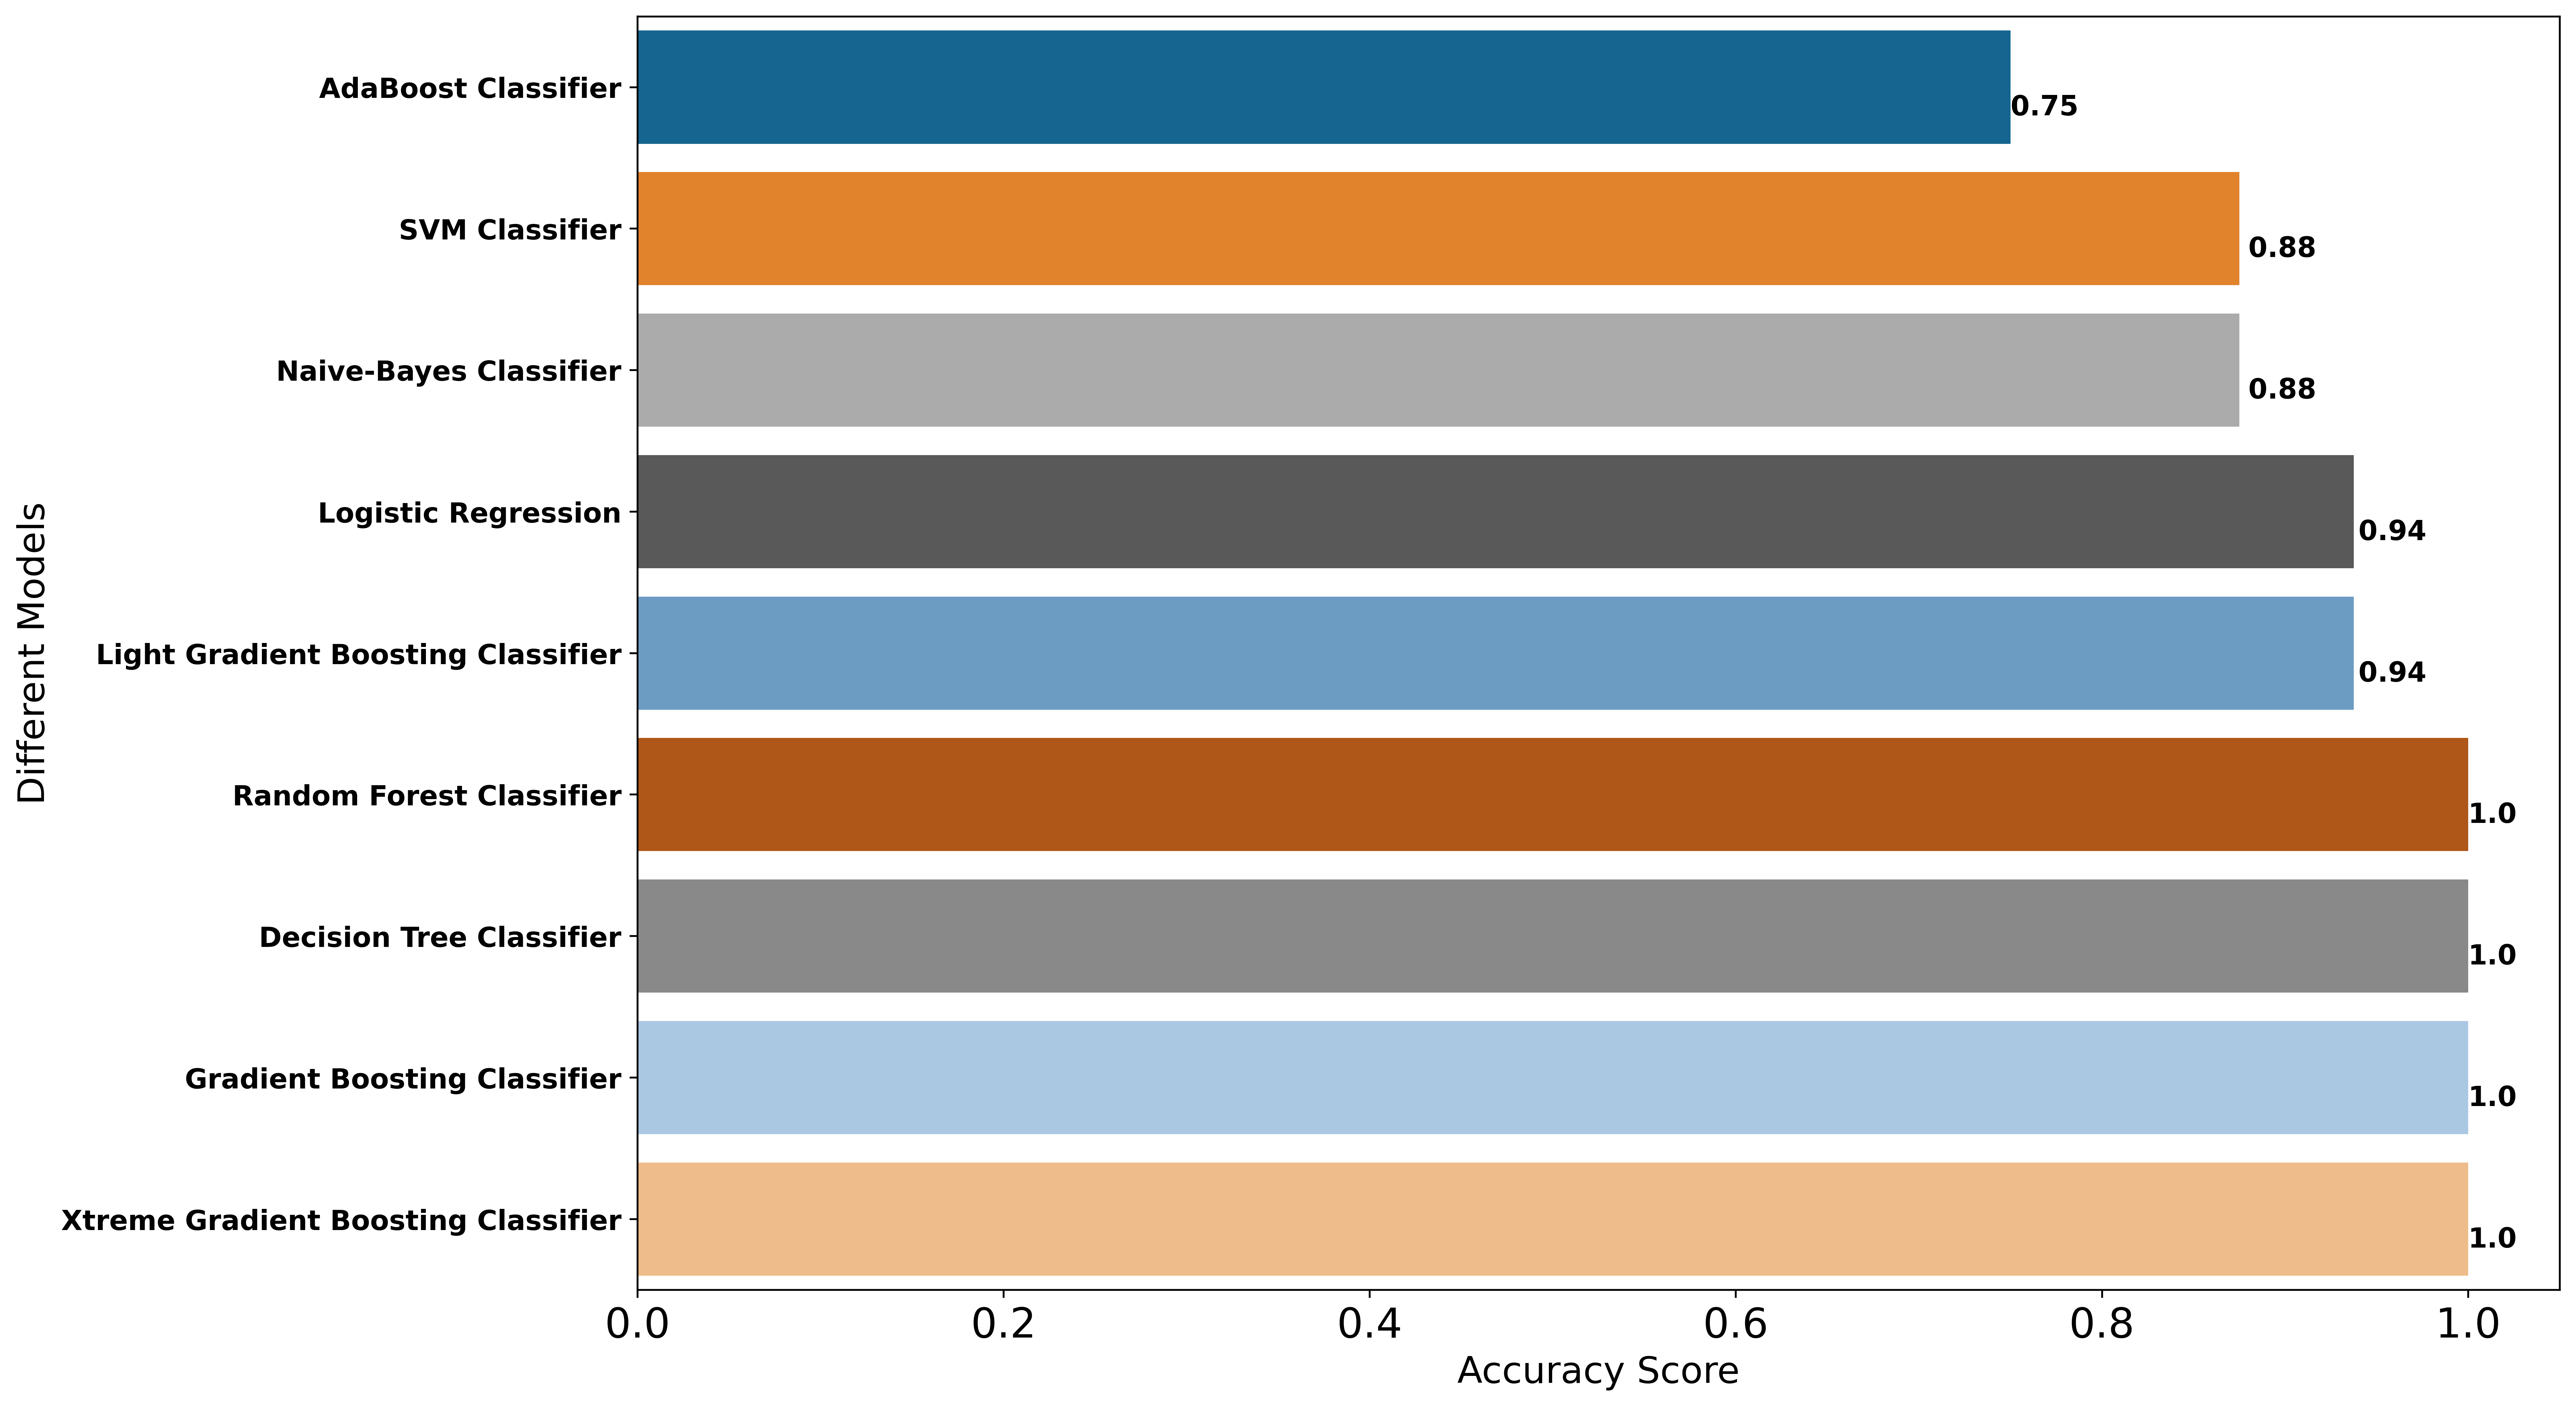

In [168]:
f,axe = plt.subplots(figsize=(15,10),dpi=500)
sns.barplot(x='Accuracy', y='Classifier', data=table, ax = axe)
axe.set_xlabel('Accuracy Score', size=16)
axe.set_ylabel('Different Models', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=18)

for i, v in enumerate(np.round(table.Accuracy.values,2)):
    axe.text(v + 0, i + .2, str(v),
            color = 'black', fontweight = 'bold', fontsize= 12)

plt.show()